In [6]:
import numpy as np
import json
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

# IMPORT MODULES TO READ VIDEO FILES
import cv2


In [12]:
# find the data
data_files = os.listdir('../data')
glue_control_files = [file for file in data_files if 'glue_control' in file]
assert len(glue_control_files) == 1, 'More than one glue control file found'
glue_control_file = glue_control_files[0]
# check if its a json file, if so, read it in
if glue_control_file.endswith('.json'):
    glue_control_file = json.load(open('../data/' + glue_control_file))
    glue_control_dir = glue_control_file['dir']
    if len(glue_control_dir)>0:
        found = False
        # loop through the glue control dir options to find the one that exists
        for dir in glue_control_dir:
            if os.path.exists(dir):
                glue_control_dir = dir
                found = True
                print('Glue control directory: {}'.format(glue_control_dir))
                break
        if not found:
            Exception('Glue control directory does not exist')
else:
    Exception('Glue control file is not a json file')
# find all cam directories in the glue control directory
glue_control_dirs = os.listdir(glue_control_dir)
glue_control_dirs = [dir for dir in glue_control_dirs if 'cam' in dir]
# GET THE NUMBER OF CAMERAS
num_cams = len(glue_control_dirs)
print('Number of cameras: {}'.format(num_cams))

Glue control directory: /mnt/g/Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46/
Number of cameras: 8


In [13]:
CAM_NO = 0
# GET THE VIDEO FILE NAMES
cam_dir = glue_control_dir + [dir for dir in glue_control_dirs if 'cam_{}'.format(CAM_NO) in dir][0] + '/1_48/'
print('Camera directory: {}'.format(cam_dir))
cam_files = os.listdir(cam_dir)
# filter out the non-video files
cam_files = [file for file in cam_files if file.endswith('.mp4')]
# sort the files by their number and drop the last file (incomplete)
cam_files = sorted(cam_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
cam_files = cam_files[:-1]
print('Number of video files: {}'.format(len(cam_files)))

Camera directory: /mnt/g/Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46/Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0/1_48/
Number of video files: 10


In [14]:
# get the first video file
cam_file = cam_files[0]
# read the video file
cap = cv2.VideoCapture(cam_dir + cam_file)
# get the frame rate
fps = cap.get(cv2.CAP_PROP_FPS)
# get the number of frames
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# get the frame size
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# create empty background image (grayscale)
background = np.zeros((frame_height, frame_width), dtype=np.float32)
# set last_frame to the first frame
last_frame = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
diffs = []
# print the video information
print('FPS: {} | Number of frames: {} | Frame size: {}x{}'.format(fps, num_frames, frame_width, frame_height))
# read all video files and add them to the background image
for i,cam_file in enumerate(cam_files):
    # print the video information
    print('Video file: {} ({}/{})'.format(cam_file, i+1, len(cam_files)))
    # read the video file
    cap = cv2.VideoCapture(cam_dir + cam_file)
    # verify the frame rate, frame size and number of frames
    assert fps == cap.get(cv2.CAP_PROP_FPS), 'Frame rate does not match'
    assert frame_width == int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), 'Frame width does not match'
    assert frame_height == int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), 'Frame height does not match'
    assert num_frames == int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), 'Number of frames does not match'
    # loop through the frames
    for i in tqdm(range(1,num_frames),leave=False):
        # read the frame
        ret, frame = cap.read()
        # convert to grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # calculate the difference between the last frame and the new frame
        diff = np.mean(frame - last_frame)
        diffs.append(diff)
        # update the last frame
        last_frame = frame.copy()
        # # add to the background image, if the difference is above a threshold
        # if diff > 0.0:
        #     background += frame/(num_frames*num_cams)
        # background += frame/(num_frames*num_cams)
    # close the video file
    cap.release()
# convert to uint8
background = np.uint8(background)
# save the background image
cv2.imwrite('../processed_data/background_cam_{}.png'.format(CAM_NO), background)

FPS: 5.0 | Number of frames: 9000 | Frame size: 2592x1944
Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_1.mp4 (1/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

KeyboardInterrupt: 

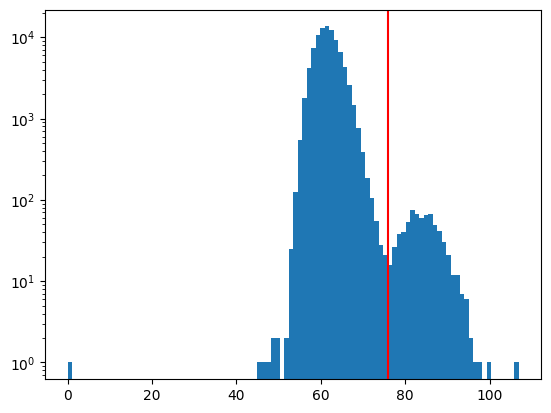

In [24]:
plt.hist(diffs, bins=100)
plt.yscale('log')
plt.axvline(76.0, color='red')
plt.show()

In [50]:
# create empty background image (grayscale)
background = np.zeros((frame_height, frame_width), dtype=np.float32)

# set last_frame to the first frame
cam_file = cam_files[0]
cap = cv2.VideoCapture(cam_dir + cam_file)
last_frame = cv2.cvtColor(cap.read()[1], cv2.COLOR_BGR2GRAY)
cap.release()
diffs = []
count = 1
# read all video files and add them to the background image
for i,cam_file in enumerate(cam_files):
    # print the video information
    print('Video file: {} ({}/{})'.format(cam_file, i+1, len(cam_files)))
    # read the video file
    cap = cv2.VideoCapture(cam_dir + cam_file)
    # loop through the frames
    for i in tqdm(range(1,num_frames),leave=False):
        # read the frame
        ret, frame = cap.read()
        # convert to grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # calculate the difference between the last frame and the new frame
        diff = np.mean(frame - last_frame)
        # update the last frame
        last_frame = frame.copy()
        # # add to the background image, if the difference is above a threshold
        if diff > 76.0:
            # convert to float (0-1)
            background += frame.astype(np.float32)/255.0
            count += 1
    # close the video file
    cap.release()
# convert to uint8
background_new = np.uint8(background/count*255.0)

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_1.mp4 (1/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_2.mp4 (2/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_3.mp4 (3/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_4.mp4 (4/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_5.mp4 (5/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_6.mp4 (6/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_7.mp4 (7/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_8.mp4 (8/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_9.mp4 (9/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

Video file: Glue_Ctl_mixed_age_19Oct23_2023_10_19_17_10_46_cam_0_10.mp4 (10/10)


  0%|          | 0/8999 [00:00<?, ?it/s]

In [52]:
# save the background image
cv2.imwrite('../processed_data/background_cam_{}.png'.format(CAM_NO), background_new)
# save the original background image as npy
np.save('../processed_data/background_cam_{}.npy'.format(CAM_NO), background)

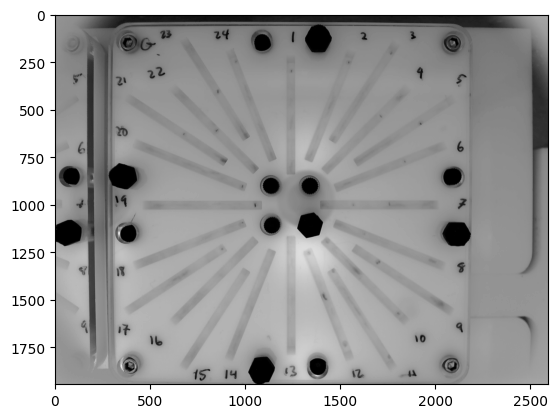

In [ ]:
plt.imshow(background_new, cmap='gray')

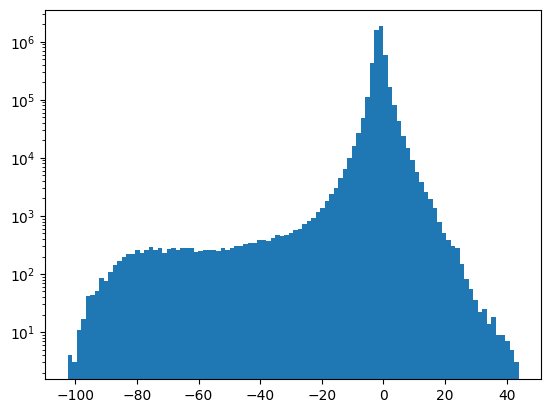

In [53]:
plt.hist((frame-background/count*255).flatten(), bins=100)
plt.yscale('log')
plt.show()

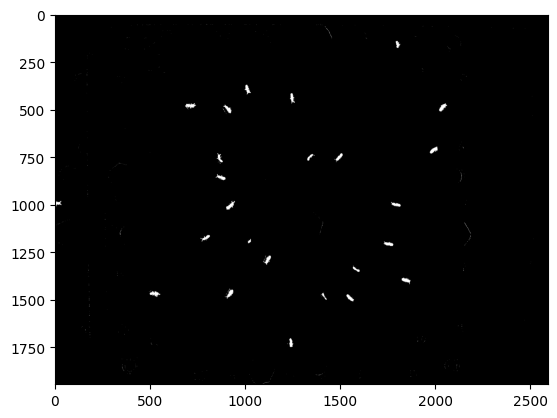

In [54]:
plt.imshow((frame-background/count*255)<-20, cmap='gray')